<br><br><font color="gray">INTEG 440 / 640<br>MODULE 9 of *Doing Computational Social Science*</font>


# <font color="green" size=40>EXPLORATORY TEXT ANALYSIS</font>

<br>

Dr. [John McLevey](http://www.johnmclevey.com)    
Department of Knowledge Integration   
Department of Sociology & Legal Studies     
University of Waterloo         

<hr>

* INTEG 440 (Undergraduate): This module is worth <font color='#437AB2'>**8%**</font> of your final grade. The questions in this module add up to 10 points. 
* INTEG 640 (Graduate): This module is worth <font color='#437AB2'>**5%**</font> of your final grade. The questions in this module add up to 10 points. 

<hr>

# Table of Contents 

* [Overview](#o)
* [Learning Outcomes](#lo) 
* [Prerequisite Knowledge](#pk) 
* [Assigned Reading](#ar) 
* [Question Links](#ql)
* [Packages Used in this Module](#packs)
* [Data Used in this Module](#data)
* [**Vectorization: From Text to Numbers**](#vect)
* [**Word Scores: TF-IDF**](#tfidf)
* [**Difference of Proportions Analysis**](#diffprop)
* [**Scaled F-Score and Interactive Text Scatterplots**](#textscatter)
* [References](#refs)

<hr>   

# Overview <a id='o'></a>

One of the first things we generally want to do in an exploratory text analysis is to identify important words in a corpus, and to compare important words across documents or categories of documents. This can help us understand -- at a relatively high-level -- what some collection of texts is about, and how content differs across categories. This module introduces several ways of doing this, each of which begins with *vectorization*, which is the process of turning our unstructured text data (in the form of strings) into a well-structured matrix of numbers. 

We will begin by covering vectorization. Then, we will cover three similar ways of identifying important words. The first is Term-Frequency Inverse Document Frequency (TF-IDF) scoring, which assigns word weights based on a consideration of how common they are within a document relative to the rest of the corpus. The second is 'difference of proportions' analysis, which, as you might expect, compares differences in the proportions of word occurrences across categories of text. The third and final method is Scaled F-scores and interactive text scatterplots for comparing content across categories of documents. 

<hr>

# Learning Outcomes  <a id='lo'></a>

Upon successful completion of this module, you will be able to: 

1. Compare the frequency of specified words across texts and over time using 'dictionary' methods 
2. Compare the frequency of words across categories of documents using interactive text scatterplots 
3. Construct document-term matrices using vectorization methods from the package `sklearn` 
4. Explain how TF-IDF scores are computed and correctly interpret their meaning 

<hr>

# Prerequisite Knowledge  <a id='pk'></a>

This module assumes comfort with basic Python, especially when it comes to manipulating string data. It also builds on some of the natural language processing tools introduced in the previous module. 

<hr>

# Assigned Readings  <a id='ar'></a>

This module assumes you have completed the assigned readings, which are listed immediately below. The readings provide a detailed explanation of the core concepts covered in this module. 

* <font color="green">Chapter 16 "Exploratory Text Analysis and Vectorization" from *Doing Computational Social Science*.</font> 

As always, I recommend that you (1) complete the assigned readings, (2) attempt to complete this module without consulting the readings, making notes to indicate where you are uncertain, (3) go back to the readings to fill in the gaps in your knowledge, and finally (4) attempt to complete the parts of this module that you were unable to complete the first time around.

This module notebook includes highly condensed overviews of *some* of the key material from the assigned reading. This is intended as a *supplement* to the assigned reading, *not as a replacement for it*. These high-level summaries do not contain enough information for you to successfully complete the exercises that are part of this module, and they do not cover every relevant topic. 

<hr>

# Question Links <a id='ql'></a>

Make sure you have answered all of the following questions before submitting this notebook on LEARN. 

1. [Question 1](#yt1)
2. [Question 2](#yt2)
3. [Question 3](#yt3)
4. [Question 4](#yt4)
5. [Question 5](#yt5)
6. [Question 6](#yt6)
7. [Question 7](#yt7)
8. [Question 8](#yt8)
9. [Question 9](#yt9)
10. [Question 10](#yt10)

<hr>

# Packages Used in this Module <a id='packs'></a>

The cell below imports the packages that are necessary to complete this module. If there are any additional packages you wish to import, you may add them to this import cell. 

In [1]:
!pip install scattertext
import scattertext as st 
import pandas as pd
import numpy as np
import spacy 
nlp = spacy.load('en_core_web_sm')

import sklearn.feature_extraction.text
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg'] # this will make plots look better in the notebook
import seaborn as sns

  Using cached scattertext-0.0.2.59-py3-none-any.whl (6.8 MB)


# Data Used in this Module <a id='data'></a>

Once again, we will use a sample of Risdale's (2016) fake and real news dataset. 

In [2]:
df = pd.read_csv('data/fake_news.csv')
fake_sample = df[df['label'] == 'FAKE'].sample(200)
real_sample = df[df['label'] == 'REAL'].sample(200)
sampled_news = pd.concat([fake_sample, real_sample])
sampled_news.head()

,Unnamed: 0,title,text,label
5926,5805,The Glorious New PC NFL Starts Next Monday!,"Afraid of ""dangerous"" Trump presidency, protes...",FAKE
1767,5440,Trump and all the other far right leaders are ...,Ian Greenhalgh is a photographer and histori...,FAKE
3255,9450,WikiLeaks Podesta Emails Confirm Hillary’s Hea...,We Are Change \nIssues surrounding Hillary Cli...,FAKE
5606,6250,Long-term Effects of the Presidential Election,"November 10, 2016 Long-term Effects of the Pre...",FAKE
2210,7416,AT&T sold access to customer data to law enfor...,AT&T sold access to customer data to law enfor...,FAKE


<hr>  

# Vectorization: From Text to Numbers <a id='vect'></a>

Before we can do anything truly interesting with our text data, we need to transform it from an unstructured collection of strings to well-structured matrices of numbers. The methods covered in this module and the two that follow operate on these matrices, not the raw text strings. 

### <font color="green">YOUR TURN! (Question 1)</font> <a id='yt1'></a>

Question is Worth: <font color="green">1.5 points</font>

Use the cell below to describe (a) *what* vectorization is, (b) *why* we do it, and (c) *what* exactly a vectorizer (e.g. `CountVectorizer` or `TfidfVectorizer`) method in `sklearn` returns. You do not need to provide a detailed description of TF-IDF here. We will get to that later in this module notebook. 

#### What is vectorization?
Vectorization is the process of reducing text to numbers that can be indicative of: 1) the frequency of the words within the text 2) importance of words within the collections 3) general presence within the text or absence. Through the collection of words and text, a matrix can be formed for analysis of similarity and more. 

#### Why we do vectorization?
Vectorization helps to extract features from data and compute values within the text to inform insights within specific documents and across different pieces of text. 

#### What exactly is a vectorizer?
`CountVectorizer` 
Sklearn will transform our data into a DTM where values are the frequency at which a word appears within the document. 

`TfidVectorizer`
Term-Frequency Inverse Document helps to analyze the effect/use of a given word within revealing a text in relation to other texts. This is a worded-weight that increases with frequency but decreases with prominence across many documents. The `sklearn` method for the TfidfVectorizer returns a DTM where values are the Tfidr weights. 

Vectorization includes two essential processes. First, we must "learn" the vocabulary used in our corpus. In `sklearn`, we do this by "fitting" a vectorizer to our data. When we fit the vectorizer, `sklearn` identifies every unique word used in the entire corpus. 

The second process is to "transform" our corpus into the feature matrix. When we use the `transform` method in `sklearn`, we produce the feature matrix we want, with our documents in the rows and words in the columns. Depending on the vectorizer we use, we can make the values in our matrix binary, counts, or a measure of word importance. 

The shape of the resulting feature matrix will be the same regardless of which vectorizer you use, although tuning the vectorizers can change the number of features that you use. The number of rows will always equal the number of documents in your corpus, and the number of columns will equal the number of unique words (after pre-processing and normalization) unless you tell `sklearn` that you want to use a smaller number of features. 

One of the most common methods for vectorization will produce a feature matrix where the cells represent counts (starting at 0) of the number of times a word appears in a given document. This is called a `CountVectorizer`. The assigned reading discusses the tradeoffs involved in using this approach and walks through a fully documented example. 

First, let's use `Countvectorizer` to produce a document-term matrix (DTM) -- also called a 'feature matrix' -- where the cells represent counts. We have not yet pre-processed our text in this notebook. One option is to use the same functions we developed in Module 9 for pre-processing our data. Another, which we will use here, is to simply tell `sklearn` to drop stopwords and lowercase all text. 

In [3]:
analysis_text = sampled_news['text']

c_vect = CountVectorizer(stop_words = 'english', lowercase = True)

c_matrix = c_vect.fit_transform(analysis_text)
print(c_matrix.shape)

(400, 19521)


Let's take a look at the most frequently used words in the entire corpus. (Remember, this is 1/2 fake news, 1/2 real news.) 


In [4]:
term_counts = pd.DataFrame(list(zip(c_vect.vocabulary_.keys(), c_matrix.data)), \
                           columns = ['Word','Frequency']).sort_values('Frequency', ascending = False)

term_counts[:25]

,Word,Frequency
71,obama,90
6993,matched,52
10305,dovish,42
6956,el,35
6983,signals,35
6969,everybody,31
10569,softly,31
17193,consistency,30
7048,climbed,28
10450,lansky,27


Our vectorizer already eliminates English language stopwords, but there are almost always domain-specific stopwords in any corpus. *In some cases*, we may want to try to identify such words -- e.g. words that are too common across documents in our corpus -- and remove them from the corpus. To do so, we can use the `max_df` and `min_df` arguments in the vectorizer. 

### <font color="green">YOUR TURN! (Question 2)</font><a id='yt2'></a>

Question is Worth: <font color="green">.5 points</font>

Use the cell below to explain what the `max_df` and `min_df` arguments are doing and why we would want to use them when we are using the `CountVectorizer` function.

The `max_df` and `min_df` arguments help to restrict the number of features within the DTM for the premise of the analysis. Dependent on the type of analysis intended to be done, restricting the set of features to exclude domain specific words or culture-specific words that do not help within the analysis. For certain cases, we'd like to remove less prominent features for which `min_df` helps to create minimum threshold. Both `min_df` and `max_df` can be represented as whole numbers or percentages indicating there presence or lack of presence within the corpus. With the `CountVectorizer` function, the frequency across the DTM can be limited to include words of interest, ones that might not be particularily too prominent within the corpus or there at all. 

Let's re-define our vectorizer and document-term matrix using a `max_df` value of 10% and a `min_df` value of 3 documents. 

In [5]:
c_vect = CountVectorizer(max_df = .1, min_df = 3, stop_words = 'english', lowercase = True)

c_matrix = c_vect.fit_transform(analysis_text)
print(c_matrix.shape)

(400, 6676)


Let's produce another list of the most frequently used words in the whole corpus. 

In [6]:
term_counts = pd.DataFrame(list(zip(c_vect.vocabulary_.keys(), c_matrix.data)), \
                           columns = ['Word','Frequency']).sort_values('Frequency', ascending = False)

term_counts[:25]

,Word,Frequency
3951,1988,52
5847,angeles,42
3942,implicitly,35
5956,alarm,27
5867,conventions,20
2707,understanding,20
5810,grounds,19
3940,assumption,18
3934,laureate,18
6390,marijuana,16


As expected, the list of top words is different than the one we previously created. 

<hr>  

# Word Scores: TF-IDF <a id='tfidf'></a>

There is only so much we can learn by inspecting lists of the most commonly used words in a corpus. Generally speaking, it can be much more useful to identify important words by considering how common a given word is within a document and how common it is across the corpus. Term Frequency Inverse Document Frequency (TF-IDF) is perhaps the most widely used method of scoring words based on this general idea. 

### <font color="green">YOUR TURN! (Question 3)</font><a id='yt3'></a>

Question is Worth: <font color="green">1.5 points</font>

Use the cell below to describe what the TF-IDF measure is. What intuitive idea is TF-IDF intended to capture? How does it try to capture it?


`TfidVectorizer`
Term-Frequency Inverse Document helps to analyze the effect/use of a given word within revealing a text in relation to other texts. This is a worded-weight that increases with frequency but decreases with prominence across many documents. The TF-IDF measure is used alternatively within a DTM to help find meaningful words that are in the context of a ratio of document-specific to cumulative-document. The weight is calculated as the domain-specifc (number of times the word has appeared in the document over total # of words in document) multiplied by the log of the ratio of total number of documents. 

Now let's get a bit more technical. 

### <font color="green">YOUR TURN! (Question 4)</font><a id='yt4'></a>

Question is Worth: <font color="green">2.25 points</font>

How do we calculate TF-IDF? In the cell below, translate the equation for TF-IDF into *plain language*. 

The equation for TF-IDF, which is discussed in the assigned reading, is: 

$$W_{i,j} = TF_{i,j} * \log\Big(\frac{N}{DF_i}\Big)$$

 The weight is calculated as the domain-specifc (number of times the word has appeared in the document over total # of words in document) multiplied by the log of the ratio of total number of documents to the number of documents a specific word appears in. The left hand side of the multiplication represents the term-frequency within a document specific manner with the right side being inverse document frequency that is represented across the whole document stack. 

`sklearn` has another vectorizer (`TfidfVectorizer`) that can produce a document-term matrix where the values of the cells are TF-IDF scores instead of counts. Unlike `CountVectorizer`, we should not use the `max_df` or `min_df` arguments here. 

### <font color="green">YOUR TURN! (Question 5)</font></font><a id='yt5'></a>

Question is Worth: <font color="green">1 point</font>

In the cell below, explain why we should not use the `max_df` and `min_df` arguments when we are using the `TfidfVectorizer`. 

Within the context of TF-IDF, you cannot use feature restriction parameters such as `max_df` and `min_df` since the TF-DIF weight measure within the DTM has to account for all features within a specific document and across all documents. Restricting the column set pre or post-processing of weights would cause issues since the general nature of the TF-IDF measure has to consider weights relative to the frequency across documents as a penalization. In some cases, introducing these arguments can hinder the researcher from seeing the full picture of important terms within the `tfidfVectorizer` since they have not considered scores across the full range of terms. The arguments only really work for measures of frequency while TF-IDF is diffeent in nature as a score/weight.

Let's vectorize our text one more time. This time we will use the `TfidfVectorizer`. 

In [7]:
t_vect = TfidfVectorizer(max_df = .1, min_df = 3, stop_words = 'english', lowercase = True)

t_matrix = t_vect.fit_transform(analysis_text)
print(t_matrix.shape)

(400, 6676)


We can also identify the words in our corpus that have the highest TF-IDF value.

In [8]:
term_tfidf = pd.DataFrame(list(zip(t_vect.vocabulary_.keys(), t_matrix.data)), \
                          columns = ['Word','TF-IDF']).sort_values('TF-IDF', ascending = False)

term_tfidf[:25]

,Word,TF-IDF
3928,properties,0.748731
6372,poured,0.665389
2719,independence,0.642399
3631,participated,0.631155
5983,pretending,0.624650
5435,recruiting,0.571562
3335,steer,0.531257
3417,canadian,0.505492
4346,type,0.501815
5472,offense,0.489462


It doesn't make a whole lot of sense to inspect the highest TF-IDF words across the whole corpus. Generally, we want to use TF-IDF to identify important words within and across documents, not at the level of the entire corpus. But this data can help us deepen our understanding of TF-IDF by comparing each word's frequency with it's TF-IDF score. In the cell below, we produce a scatterplot of the two vectors. You should notice a drastic decline in TF-IDF score as frequency increases. 

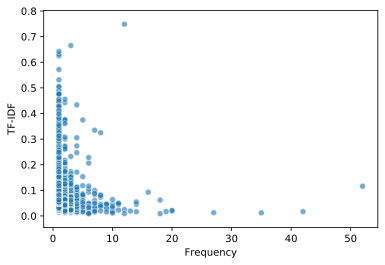

In [9]:
# merge the two dataframes 
freq_tfidf = pd.merge(term_counts, term_tfidf, on = 'Word')

# make a scatterplot 
sns.scatterplot(freq_tfidf['Frequency'], freq_tfidf['TF-IDF'], alpha = .6)


### <font color="green">YOUR TURN! (Question 6)</font><a id='yt6'></a>

Question is Worth: <font color="green">1 point</font>
    
In the cell below, explain *why* the list of top words produced by the `CountVectorizer` and the `TfidfVectorizer` are so different, and why we see the relationship we do between frequency and TF-IDF scores in the scatterplot produced by the cell above. Be sure to discuss, once again, how `TF-IDF` scores are computed. 

The CountVectorizer can show the most frequent words across a particular document and the corpus but does not highlight the most important words as a TfidfVectorizer would. After ignoring stopwords, the two vectorizers highlight different insights where the likes of "Benjamin" and "sell" are more frequenct in the corpus while words like "observer" and "gunfire" will be more meaningful as they are frequent but not relative to the entire corpus as a commonality. The relationship shows that by increasing frequency, the TF-IDF score will decrease drastically since the IDF (inverse document frequency) for which the log ratio will decreaase as the denominator will increase with frequency for a specific word across documents. The frequency of a word within the corpus will cause and offset to decrease in weight in contrast to the frequency at which a word is present within a specific document. 

We will return to TF-IDF in the next module, where we will be clustering documents based on their similarity. For now, though, let's return to the count data and consider a method called "difference of proportions" analysis. 

<hr>

# Difference of Proportions Analysis <a id='diffprop'></a>

The code in this example difference of proportions analysis modifies some open source code provided by Laura Nelson for her 2017 article on computational grounded theory.

In this example, we have two categories of documents: real news and fake news. Our goal is to identify words that are more strongly associated with one category than the other using a difference of proportions analysis. To do so, we will begin by concatenating all text within each label to one long string. 

In [10]:
fake_stories = sampled_news[sampled_news['label'] == 'FAKE']
fake_string = ' '.join(str(s) for s in fake_stories['text'].tolist())

real_stories = sampled_news[sampled_news['label'] == 'REAL']
real_string = ' '.join(str(s) for s in real_stories['text'].tolist())

Then we will feed it into a vectorizer and compute the proportion of word frequencies for our comparison.

We have already initialized a countvectorizer in the previous section of this notebook, but we will do it again to make each step of the difference of proportions workflow more explicit. 

In [11]:
vect = CountVectorizer(stop_words="english")

In [12]:
compare = pd.DataFrame(vect.fit_transform([fake_string, real_string]).toarray(), columns=vect.get_feature_names())

The code above produces a matrix where the first row is a vector for the fake news stories and the second row is a vector for the real stories. There are more than 20K columns in this matrix because that's how many unique tokens there are in the corpus vocabulary. 

The next step is to compute the total number of words used in each of the two document categories. We can do this by summing the rows (which, if you recall, can be specified by `axis=1` in the `sum` method). 

In [13]:
compare['total_words'] = compare.sum(axis=1)

We can now convert the frequency counts in the cells of the matrix to proportions by simply dividing the frequency by the total number of words used in the document category. 

In [14]:
compare = compare.iloc[:,0:].div(compare['total_words'], axis=0)

Finally, we can compute the *difference* in proportional word frequencies across our two categories of text. The code below subtracts the scores for real news from the scores for fake news and adds them as a third row of the matrix. 

In [15]:
compare.loc[2] = compare.loc[0] - compare.loc[1]
compare

,00,000,00am,01,011,02,03,039,04,040,...,zombies,zone,zones,zoning,zoomed,zooming,zoomph,zora,zuckerberg,total_words
0,0.000171,0.000965,0.000016,0.000047,0.000000,0.000047,0.000047,0.000016,0.000016,0.000000,...,0.000016,0.000451,0.000233,0.000000,0.000016,0.000016,0.000000,0.000016,0.000031,1.0
1,0.000053,0.001197,0.000000,0.000000,0.000011,0.000000,0.000000,0.000000,0.000000,0.000011,...,0.000000,0.000043,0.000021,0.000011,0.000000,0.000000,0.000011,0.000000,0.000000,1.0
2,0.000118,-0.000232,0.000016,0.000047,-0.000011,0.000047,0.000047,0.000016,0.000016,-0.000011,...,0.000016,0.000409,0.000212,-0.000011,0.000016,0.000016,-0.000011,0.000016,0.000031,0.0


Next, we will attach the difference of proportion scores to the words in our corpus and compare the words that are strongly associated with each category of text. Words that have high positive values are more distinctive of the fake news stories. Words with the lowest scores are distinctive of the real news stories. 

In [16]:
diff = pd.DataFrame(compare.loc[2].sort_values(axis=0, ascending=False))
diff.columns = ['DoP']
diff['Word'] = diff.index
diff.reset_index()

,index,DoP,Word
0,hillary,0.003941,hillary
1,2016,0.002411,2016
2,com,0.001740,com
3,october,0.001664,october
4,world,0.001579,world
...,...,...,...
19517,cruz,-0.002198,cruz
19518,republican,-0.002223,republican
19519,sanders,-0.002526,sanders
19520,state,-0.003072,state


We can easily select the highest and lowest values using the head and tail methods. Below, I iterate over the rows of the dataframe and print the 20 words most associated with fake news and the 20 most associated with real news. 

In [17]:
# highest are distinctive of fake news
print('Words associated with fake news stories:\n')
num_words = 50
for index, row in diff.head(num_words).iterrows():
    print('{} ({})'.format(row['Word'], np.round(row['DoP'], 4)))

Words associated with fake news stories:

hillary (0.0039)
2016 (0.0024)
com (0.0017)
october (0.0017)
world (0.0016)
election (0.0015)
russia (0.0015)
fbi (0.0013)
war (0.0012)
donald (0.0011)
podesta (0.001)
comey (0.001)
american (0.001)
russian (0.001)
people (0.001)
infowars (0.0009)
www (0.0008)
just (0.0008)
yglesias (0.0008)
http (0.0007)
investigation (0.0007)
water (0.0007)
know (0.0007)
milk (0.0007)
email (0.0007)
china (0.0006)
silver (0.0006)
emails (0.0006)
history (0.0006)
nato (0.0006)
wikileaks (0.0006)
share (0.0006)
america (0.0006)
soros (0.0005)
media (0.0005)
brain (0.0005)
force (0.0005)
foundation (0.0005)
democracy (0.0005)
reason (0.0005)
brazile (0.0005)
fact (0.0005)
director (0.0005)
twitter (0.0005)
order (0.0005)
information (0.0005)
life (0.0005)
fed (0.0005)
cohen (0.0005)
evidence (0.0004)


In [18]:
# lowest are distinctive of real news
print('Words associated with real news stories:\n')
num_words = 50
for index, row in diff.tail(num_words).iterrows():
    print('{} ({})'.format(row['Word'], np.round(row['DoP'], 4)))

Words associated with real news stories:

governor (-0.0007)
night (-0.0007)
iowa (-0.0007)
says (-0.0007)
party (-0.0007)
nomination (-0.0008)
iran (-0.0008)
hampshire (-0.0008)
romney (-0.0008)
debate (-0.0008)
win (-0.0008)
percent (-0.0008)
democrats (-0.0008)
monday (-0.0008)
boehner (-0.0008)
convention (-0.0009)
islamic (-0.0009)
sen (-0.0009)
week (-0.0009)
mcconnell (-0.0009)
law (-0.0009)
rubio (-0.0009)
deal (-0.0009)
paris (-0.0009)
race (-0.0009)
say (-0.0009)
security (-0.0009)
candidates (-0.001)
states (-0.001)
house (-0.001)
tuesday (-0.001)
voters (-0.001)
court (-0.001)
told (-0.001)
new (-0.0011)
police (-0.0011)
primary (-0.0011)
conservative (-0.0011)
delegates (-0.0014)
bush (-0.0014)
campaign (-0.0014)
republicans (-0.0014)
trump (-0.0015)
senate (-0.0015)
gop (-0.0015)
cruz (-0.0022)
republican (-0.0022)
sanders (-0.0025)
state (-0.0031)
said (-0.0088)


### <font color="green">YOUR TURN! (Question 7)</font> <a id='yt7'></a>

Question is Worth: <font color="green">.25 points</font>

What conclusions can you draw from this simple "difference of proportions" analysis? What are some of the key differences between these two types of documents? Feel free to adjust the number of words you inspect by changing the value of `num_words`. Write your answer in the cell below. 

Difference of proportions analysis helps to show us the different words and terminologies used by different groups/organizations of people. In this context, we're looking at key differences between Risdale's real and fake news dataset to identify the differences in words used between real news tweets and misinformation for fake news. In this simpel DOP analysis, it can be seen that the primary words in relation to fake news revolving primarily around war, the middle east/russia, and the world. In the lower positive DoP scores (when `num_words` is 50), you can notice how the words transition to the topic of general lifestyle. While the real news seems to revolve around primarily american politics to its core from the parties involved to the congress and various political party figures (Trump, Sanders, Cruz). Interesting to see how Hillary was primarily involved in fake news while the term clinton is in the lower tier of real news. 

<hr>

# Scaled F-Score and Text Scatterplots <a id='textscatter'></a>

TF-IDF scores and 'difference of proportions' analysis both assign scores to words based on some consideration of how frequently they appear within and across documents, or collections of documents. In this final section on exploratory text analysis, we will consider one other measure of word importance -- Scaled F-Score -- and will introduce a method of exploring a corpus using interactive scatterplots. 

For this part of the module, we will use the `scattertext` package. The first thing we will do is construct a `scattertext` corpus object, which we can do with the following code. It will take some time to run because it is running the text through a pre-processing workflow in `spacy`, similar to the one we introduced in the previous module. 

In [26]:
corpus = st.CorpusFromPandas(sampled_news, category_col='label', text_col='text', nlp=nlp).build()

First, let's make sure we are clear about what Scaled F-Scores are. 

### Precision, Recall, and F-Scores

`Scattertext` identifies terms that are statistically associated with categories of documents, which in our data are 'Fake' or 'Real'. To do so, it uses measures of term importance that have been developed by specialists in the field of information retrieval. The key measure used is Scaled F-score. F-score is the harmonic mean of two measures: *precision* and *recall*.

Imagine, for a moment, that you are evaluating the results of a search of some set of documents. If you searched for 'split labour market' and all of the results that were returned were relevant, then you would have a high precision score. If many irrelevant results were returned, you would have a lower precision score. While this is useful, it does not tell us whether or not all of the relevant documents were returned. This is where recall helps. Recall is the fraction of relevant documents that our search query actually retrieved.

In short, high precision means that we have far more relevant results than irrelevant results, and high recall means we discovered most of what is actually relevant in the document collection. Typically increases in one are associated with decreases in the other, but when a word has high precision and high recall, it will have a higher **F-score**. `Scattertext` computes precision and recall for each category, and then computes Scaled F-scores.

We can use the method `.get_scaled_f_scores_vs_background()` to identify words that distinguish our fake news corpus from *general English-language data*. 

In [39]:
np.seterr(divide='ignore', invalid='ignore')
print(list(corpus.get_scaled_f_scores_vs_background().index[:25]))

['obama', 'trump', 'twitter', 'comey', 'podesta', 'obamacare', 'boehner', 'hillary', 'kasich', 'wikileaks', 'barack', 'facebook', 'rubio', 'brazile', 'manafort', 'fiorina', 'bataclan', 'romney', 'yglesias', 'tplf', 'jindal', 'superdelegates', 'clinton', 'sanders', 'mateen']


It is also possible to have `Scattertext` return words that are associated most with each of our two categories. Here we construct a second `dataframe` from our `Scattertext` corpus that contains the term frequencies for sociology and political science articles. The `dataframe` can be sorted to display words with high F-scores in either category. 

In [40]:
term_df = corpus.get_term_freq_df()
term_df['fscore_fake'] = corpus.get_scaled_f_scores('FAKE')
term_df['fscore_real'] = corpus.get_scaled_f_scores('REAL')

In [41]:
topFake = term_df.sort_values(by='fscore_fake', ascending=False).reset_index()[:25]
topReal = term_df.sort_values(by='fscore_real', ascending=False).reset_index()[:25]

In [42]:
topFake

,term,FAKE freq,REAL freq,fscore_fake,fscore_real
0,podesta,68,2,1.000000,0.000000
1,comey,67,2,0.999356,0.000644
2,october,122,21,0.989499,0.010501
3,yglesias,50,0,0.978940,0.021060
4,&,55,7,0.975937,0.024063
5,fbi,96,29,0.973594,0.026406
6,milk,46,2,0.963601,0.036399
7,hillary,347,138,0.961894,0.038106
8,the election,67,24,0.961163,0.038837
9,2016,200,85,0.958493,0.041507


In [43]:
topReal

,term,FAKE freq,REAL freq,fscore_fake,fscore_real
0,delegates,1,128,0.000000,1.000000
1,cruz,3,210,0.000454,0.999546
2,primary,10,120,0.014391,0.985609
3,conservative,11,123,0.015251,0.984749
4,rubio,0,83,0.015983,0.984017
5,senate,16,160,0.016258,0.983742
6,mcconnell,0,82,0.017092,0.982908
7,sanders,30,280,0.017582,0.982418
8,paris,6,93,0.019014,0.980986
9,sen.,4,86,0.021072,0.978928


You should be able to see the frequencies and F-scores for both fake and real news stories. You will likely notice that many words with strong associations with one category have weak associations with the other category. Some words are strongly associated with both categories. Depending on what we want to know, we can think of these words as domain-specific stopwords. (Can you think of any examples?) 

Our next task is to better understand these relationships by plotting category-term associations with a scatterplot. `Scattertext` uses a Javascript library called `D3` to produce interactive graphs that run in your browser. Hovering over points reveals additional information about words that are statistically associated with our categories. 

We will run some code to display the results in our notebook, but it will also write a file to disk that you can open up later and explore. The file may take some time to load. That's normal. 

In [46]:
html = st.produce_scattertext_explorer(corpus, category='FAKE', category_name='FAKE', not_category_name='REAL', width_in_pixels=1000)

It is possible to display this scatterplot in the notebook itself, but it consumes a lot of energy and makes the notebook a bit unresponsive as the graph loads. Instead, we will write the html file to disk and open it in a separate tab. This has the added benefit of being able to load up the graph later, when the Jupyter Notebook server is not running. 

The file will write the `output` subdirectory. If you go there in the home folder of the Jupyter Notebook, you can click the html file and it will open in a new tab in your browser. 

In [47]:
with open('output/news_scattertext.html', 'wb') as f:
    f.write(html.encode('utf-8'))

### <font color="green">YOUR TURN! (Question 8)</font><a id='yt8'></a>

Question is Worth: <font color="green">1 point</font>

What are the similarities and differences in the types of things that fake and real news stories are about? How do you know? Answer in the cell below. Be sure to make explicit reference to the scattertext graph. If you are uncertain about your interpretation of the graph, feel free to consult the assigned reading. 

Similarities between fake and real news stories can be seen as those words that follow the linear trend that is effectively separating the red and blue plot points on the graph. These are the ones which have a relatively equal category-term association and a close to 0 F-score. These are particulary words that are not tied to a particular topic but could be considered as stopwords. Among the extremities of fake and real news stories, there lies a similarity in the general premise of politics being the driver of real and fake tweets. These can be seen by looking at the top words in each category relative to frequency ratio and particular F-score. Red dots indicate a higher association to REAL news while blue dots to the left indicate a higher association to FAKE news. In the fake side of things, there are a lot of top words tied to the fbi, russia, and primarily Hillary Clinton as seen from previous analyses. These are people and cases that are tied to potentially scandalous or controversional inclusions. In the real side, there seems to be a widespread of political terms used highlighting both the conservatives and republicans across the politcal spectrum. 

We can also use `scattertext` to produce a 'corpus characteristicness plot.' Below, we will produce the `scattertext` html object and call it `corchar`, for 'corpus characteristics.'

In [49]:
corchar = st.produce_characteristic_explorer(corpus, category='FAKE', category_name='FAKE', not_category_name='REAL', width_in_pixels=1000)

### <font color="green">YOUR TURN! (Question 9)</font><a id='yt9'></a>

Question is Worth: <font color="green">1 point</font>

In the code cell below, write the `scattertext` html object to an external html file. Once it has written to file, open it in a new browser tab. 

In [50]:
## Your Answer Here ## 
with open('output/corchar_scattertext.html', 'wb') as f:
    f.write(html.encode('utf-8'))

Finally, we will end on a general note about visualizing text. 

### <font color="green">YOUR TURN! (Question 10)</font><a id='yt10'></a>

Question is Worth: <font color="green">.25 points</font>

The assigned reading explains why you should never use word clouds or similar graphics, and why you should consider using text scatterplots instead. In the cell below, in your own words, explain the problems with word clouds and why text scatterplots are better. 

Word clouds or similar graphics are great in being able to highlight the prominence of important words/terms relative to some sort of visual adjustment (size, color, etc.) but they are not able to quantitatively tell the whole story. They are low-information visuals and confusing since size or particular orientation can not be particularily tied to a specific measurement or axis of reference. With text scatterplots, you have the opportunity to place data in a explicit axis-oriented format where there is quantitative logic (f-score, frequency ratio, etc.) applied to it. This provides a direction of data to follow and is able to succinctively tell more of the story with data tied to it (outliers, top words based on frequency, F-score). 

<hr>

# <font color="green">Do You See Something That Could be Better?</font>

I am committed to collecting student feedback to continuously improve this course for future students. I would like to invite you to help me make those improvements. 

As you worked on this module, did you notice anything that could be improved? For example, did you find a typo in the module notebook **or in the assigned reading**? Did you find the explanation of a particular concept or block of code confusing? Is there something that just isn’t clicking for you? 

If you have any feedback for the content in this module, please enter it into the text block below. I will review feedback each week and make a list of things that should be changed before the next offering. 

Please know that *nothing you say here, however critical, will impact how I evaluate your work in this course*. There is no risk that I will assign a lower grade to you if you provide critical feedback. In fact, if the feedback you provide is thoughtful and constructive, I will assign up to 3% bonus marks on your final course grade. 

Thanks for your help improving the course! 

# Your Feedback Here :-)

<hr>

# REFERENCES <a id='refs'></a>

* McLevey, John. 2020. *Doing Computational Social Science*. Sage. London, UK. 
* Nelson, Laura. 2017. 'Computational Grounded Theory: A Methodological Framework.' *Sociological Methods & Research*. 1:40. 
* Risdale, Megan. 2016. "Getting Real about Fake News. Text & metadata from fake & biased news sources around the web." Dataset available on Kaggle: https://www.kaggle.com/mrisdal/fake-news 